데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

test_data = pd.read_csv('/content/drive/My Drive/김영희/influenza_COVID-19_One-Hot Encoding.csv',encoding='utf-8')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63360 entries, 0 to 63359
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Fever                    63360 non-null  int64
 1   Cough                    63360 non-null  int64
 2   Difficulty-in-Breathing  63360 non-null  int64
 3   Sore-Throat              63360 non-null  int64
 4   Nasal-Congestion         63360 non-null  int64
 5   Diarrhea                 63360 non-null  int64
 6   Age_0-9                  63360 non-null  int64
 7   Age_10-19                63360 non-null  int64
 8   Age_20-24                63360 non-null  int64
 9   Age_25-59                63360 non-null  int64
 10  Age_60+                  63360 non-null  int64
 11  Gender_Female            63360 non-null  int64
 12  Gender_Male              63360 non-null  int64
 13  Gender_Transgender       63360 non-null  int64
 14  Severity_Mild            63360 non-null  int64
 15  Se

속성데이터와 결과 데이터를 나누기 

In [2]:
x_data = test_data.iloc[:, 0:18] #속성
y_data = test_data.iloc[:, 18] #답

train_test_split이용해서 훈련데이터와 검증데이터를 나누기

In [3]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
#                                                      random_state=7) 

from sklearn.model_selection import train_test_split
best_size = 0.5
best_state = 100
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data
                                                      ,test_size=best_size #테스트용, 학습용 비율을 결정하는 값 ex) 0.5 = 반반씩.
                                                     ,random_state=best_state # 데이터가 정렬되어 있는 경우 섞어주는 작업이 필요하여 필요한 부분.
                                                      , stratify=y_data) #필수는 아니지만 test, train 데이터를 나눌때 y값의 비율을 맞추고자 쓴 부분

랜덤 포레스트 알고리즘 적용 (기본으로한거) - 랜덤 포레스트 자체가 정확도가 높은걸로 유명함

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

정확도 확인하기 (이미 이거 자체로도 높음)

In [5]:
print (" score : %f" %rf.score(x_test, y_test))

 score : 0.890878


Random Forest의 하이퍼 파라미터 튜닝 (하지만 더 높여보겠음)

In [6]:
from sklearn.model_selection import GridSearchCV 

param_range1=[50,100,150,200]
param_range2=[1,4,7,10]
param_range3=[5,9,13,17]

rf_param_grid = {
    'n_estimators' : param_range1,   #결정트리 개수
    'max_depth' : param_range2,   #트리의 깊이
    'max_features' : param_range3,   #데이터의 feature을 참조할 비율
    'min_samples_leaf' : param_range2,   #리프노드가 되기 위한 최소한의 샘플 데이터 수
    'min_samples_split' : param_range2    #노드를 분할하기 위한 최소한의 데이터 수 
}

rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring="accuracy", n_jobs=-1, verbose =1)
rf_grid.fit(x_train, y_train)

print("최고의 파라미터 : ", rf_grid.best_params_ ) #알아서 최고의 파라미터를 뽑아줌


Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 83.6min
[Parallel(n_jobs=-1)]: Done 5120 out of 5120 | elapsed: 88.0min finished


최고의 파라미터 :  {'max_depth': 4, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


최고의 파라미터 대로 훈련시킬 경우

In [7]:
model = RandomForestClassifier(random_state=0, 
                               n_estimators=rf_grid.best_params_['n_estimators'], 
                               max_depth=rf_grid.best_params_['max_depth'],
                               max_features=rf_grid.best_params_['max_features'],
                               min_samples_leaf=rf_grid.best_params_['min_samples_leaf'],
                               min_samples_split=rf_grid.best_params_['min_samples_split'],
                               verbose=1, 
                               n_jobs=-1, 
                               warm_start=True)

model.fit(x_train, y_train)
print ("튜닝한 후 정확도 : %f" %model.score(x_test, y_test)) # 조금 더 높아짐


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


튜닝한 후 정확도 : 0.900347


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


가상데이터 적용

In [8]:
Yoo = np.array([
    1,# Fever
    1,# Cough
    0,0,
    1,# Nasal-Congestion
    0,0,0,0,
    1,# Age_25-59
    0,0,
    1,# Gender_Male
    0,
    1,# Serverity_Mild
    0,0,0]).reshape(1,18)

예측

In [9]:
print(model.predict_proba(Yoo))

[[0.92500375 0.07499625]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


어떤 파라미터가 제일 중요한지 확인해봄

In [10]:
feature_importances = model.feature_importances_

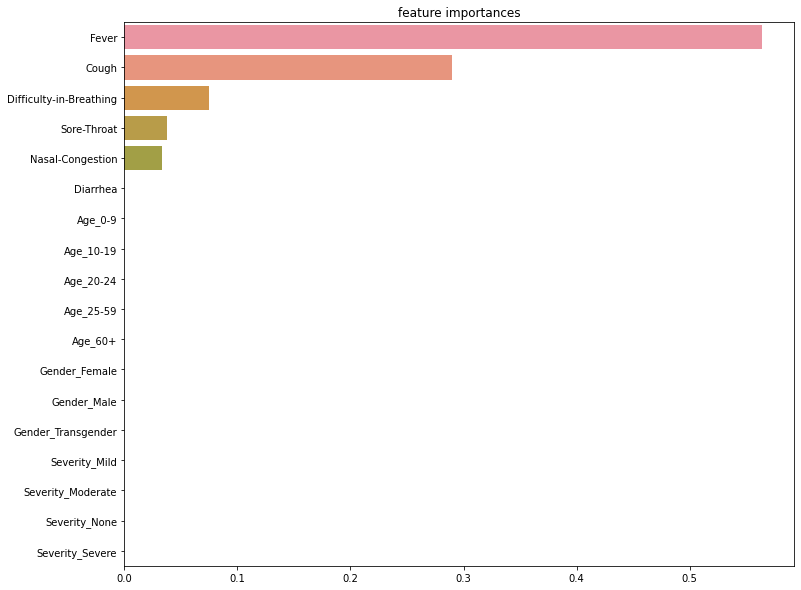

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ft_importances = pd.Series(feature_importances, index = x_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=ft_importances, y = x_train.columns)
plt.show()